In [675]:
setwd("~/Documents/DE/Shed/")
require(ggplot2)
require(nlme)
require(tidyr)
require(MASS)
require(glmm)
require(dplyr)
require(EnvStats)

Other things to look at: 
Can we compare oysters that died to oysters that survived. 
when an oyster died, you know how many cells they released in the last 6 hours. 

In [676]:
cells=read.csv("Cells_found_actualhigh.csv")
cells2=read.csv("Cells_found.csv")
oysters=read.csv("Oyster_data.csv")

In [677]:
head(cells)

ID,Ambient_5,Ambient_7,Ambient_10,Ambient_14,Heat_21,Heat_23,Heat_28,Heat_32
26Y,NA,NA,4,5,NA,NA,4320,3564
27Y,NA,NA,3771,NA,NA,NA,NA,NA
28Y,NA,NA,NA,NA,112,6,NA,NA
29Y,NA,NA,0,NA,NA,NA,NA,0
30Y,NA,NA,0,7,NA,NA,85,0
32Y,NA,NA,1,59,NA,NA,62,60


In [678]:
cells=gather(cells, date, number, Ambient_5:Heat_32)

In [679]:
head(cells)

ID,date,number
26Y,Ambient_5,NA
27Y,Ambient_5,NA
28Y,Ambient_5,NA
29Y,Ambient_5,NA
30Y,Ambient_5,NA
32Y,Ambient_5,NA


In [680]:
cells=separate(cells, date, c("Treatment", "day" ))

In [681]:
head(cells)

ID,Treatment,day,number
26Y,Ambient,5,NA
27Y,Ambient,5,NA
28Y,Ambient,5,NA
29Y,Ambient,5,NA
30Y,Ambient,5,NA
32Y,Ambient,5,NA


In [682]:
all=merge(cells,oysters, by="ID")

In [683]:
tail(all)

,ID,Treatment,day,number,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived
563,9W,Ambient,5,NA,LOW,2,,NA,NA,NA,NA,Yes,Yes
564,9W,Heat,23,NA,LOW,2,,NA,NA,NA,NA,Yes,Yes
565,9W,Ambient,7,NA,LOW,2,,NA,NA,NA,NA,Yes,Yes
566,9W,Heat,28,8,LOW,2,,NA,NA,NA,NA,Yes,Yes
567,9W,Heat,32,0,LOW,2,,NA,NA,NA,NA,Yes,Yes
568,9W,Ambient,14,14,LOW,2,,NA,NA,NA,NA,Yes,Yes


In [684]:
all$Trial=ifelse(all$day=="5"|all$day=="10"|all$day== "21"| all$day=="28", "one", "two")

## Influence of salinity on mackin score of tissue (for oysters that survived) 

In [685]:
survivors=all[all$Survived=="Yes",]

In [686]:
NROW(survivors)

[1] 312

Warning message:
“Removed 16 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 16 rows containing missing values (geom_point).”

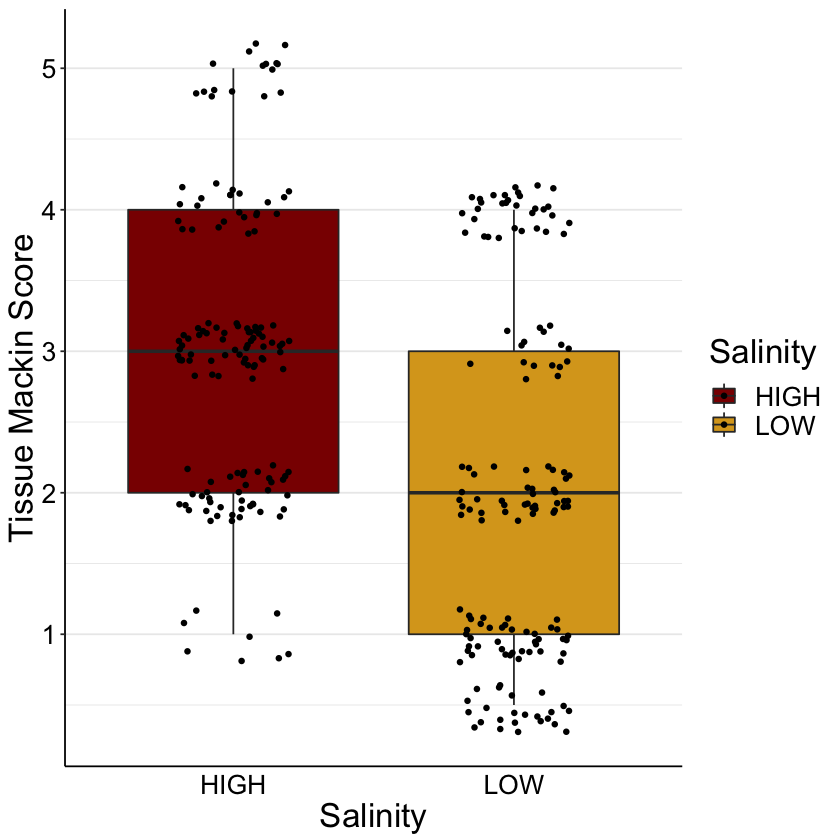

In [687]:
ggplot(survivors, aes(x = Salinity, y = TISSUE, fill=Salinity)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
        geom_boxplot()+
geom_jitter(shape=16, position=position_jitter(0.2))+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Tissue Mackin Score")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 16 rows containing non-finite values (stat_bin).”

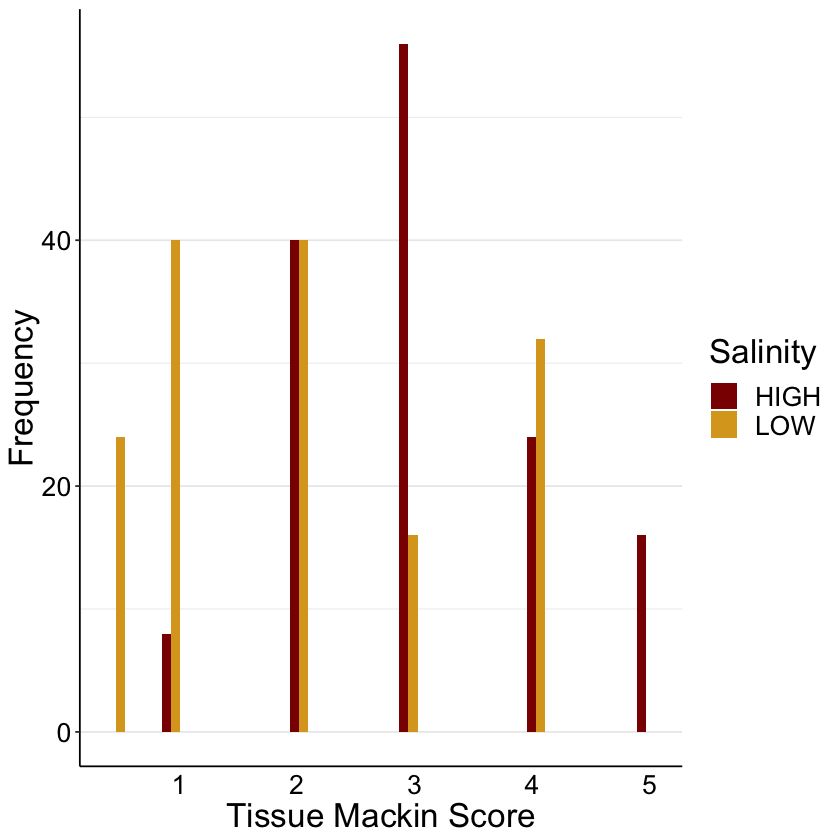

In [688]:
ggplot(survivors, aes(x=TISSUE, fill=Salinity)) +
  geom_histogram(position="dodge")+
scale_fill_manual(values=c("darkred", "goldenrod"))+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Frequency")+xlab("Tissue Mackin Score")

two anovas within high and low look at sorry effect of mackin score on and see if the slopes are different 

In [689]:
head(all)

ID,Treatment,day,number,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Trial
10W,Heat,21,27,LOW,0.5,,NA,NA,NA,NA,No,No,one
10W,Ambient,7,NA,LOW,0.5,,NA,NA,NA,NA,No,No,two
10W,Ambient,5,NA,LOW,0.5,,NA,NA,NA,NA,No,No,one
10W,Heat,23,0,LOW,0.5,,NA,NA,NA,NA,No,No,two
10W,Ambient,10,NA,LOW,0.5,,NA,NA,NA,NA,No,No,one
10W,Ambient,14,NA,LOW,0.5,,NA,NA,NA,NA,No,No,two


In [690]:
survivors$TISSUE=as.factor(as.character(survivors$TISSUE))

logistic regression with mackin score as ordinal response. 

In [691]:
head(survivors)

,ID,Treatment,day,number,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Trial
25,13W,Heat,21,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,one
26,13W,Ambient,7,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,two
27,13W,Heat,23,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,two
28,13W,Ambient,10,1,LOW,0.5,,NA,NA,NA,NA,No,Yes,one
29,13W,Heat,32,17,LOW,0.5,,NA,NA,NA,NA,No,Yes,two
30,13W,Heat,28,3,LOW,0.5,,NA,NA,NA,NA,No,Yes,one


In [448]:
m = polr(TISSUE ~ Salinity, data = survivors, Hess=TRUE)

## view a summary of the model
summary(m)
(ctable <- coef(summary(m)))

p <- pnorm(abs(ctable[, "t value"]), lower.tail = FALSE) * 2
(ctable <- cbind(ctable, "p value" = p))

Call:
polr(formula = TISSUE ~ Salinity, data = survivors, Hess = TRUE)

Coefficients:
             Value Std. Error t value
SalinityLOW -1.589     0.2031  -7.821

Intercepts:
      Value    Std. Error t value 
0.5|1  -3.2014   0.2272   -14.0920
1|2    -1.9987   0.1797   -11.1225
2|3    -0.5489   0.1416    -3.8762
3|4     0.3726   0.1458     2.5554
4|5     2.4557   0.2664     9.2178

Residual Deviance: 1164.903 
AIC: 1176.903 
(24 observations deleted due to missingness)

,Value,Std. Error,t value
SalinityLOW,-1.588541,0.2031009,-7.821436
0.5|1,-3.201353,0.2271746,-14.092039
1|2,-1.998689,0.1796978,-11.122501
2|3,-0.548864,0.1415980,-3.876212
3|4,0.372583,0.1458048,2.555355
4|5,2.455729,0.2664120,9.217786


,Value,Std. Error,t value,p value
SalinityLOW,-1.588541,0.2031009,-7.821436,5.222432e-15
0.5|1,-3.201353,0.2271746,-14.092039,4.251065e-45
1|2,-1.998689,0.1796978,-11.122501,9.749968e-29
2|3,-0.548864,0.1415980,-3.876212,1.060951e-04
3|4,0.372583,0.1458048,2.555355,1.060796e-02
4|5,2.455729,0.2664120,9.217786,3.032972e-20


## Influence of heat on number of cells released. broken up by mackin score of tissue. Survivors only

Warning message:
“Removed 156 rows containing missing values (geom_point).”

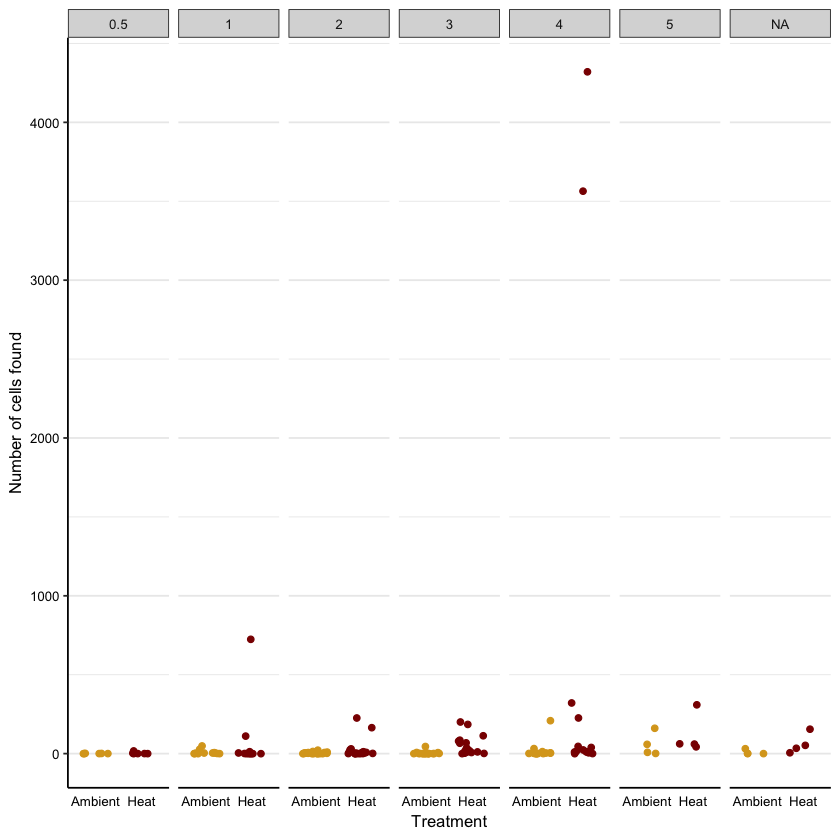

In [692]:
ggplot(survivors, aes(x = Treatment, y = number, col=Treatment, group=ID)) +
scale_color_manual(values=c("goldenrod", "darkred"))+
       geom_jitter(position=position_jitter(0.3))+
#geom_line()+
 facet_grid(. ~ TISSUE)+
theme_bw()+
 
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=10))+
ylab("Number of cells found")

Warning message:
“Removed 156 rows containing missing values (geom_point).”

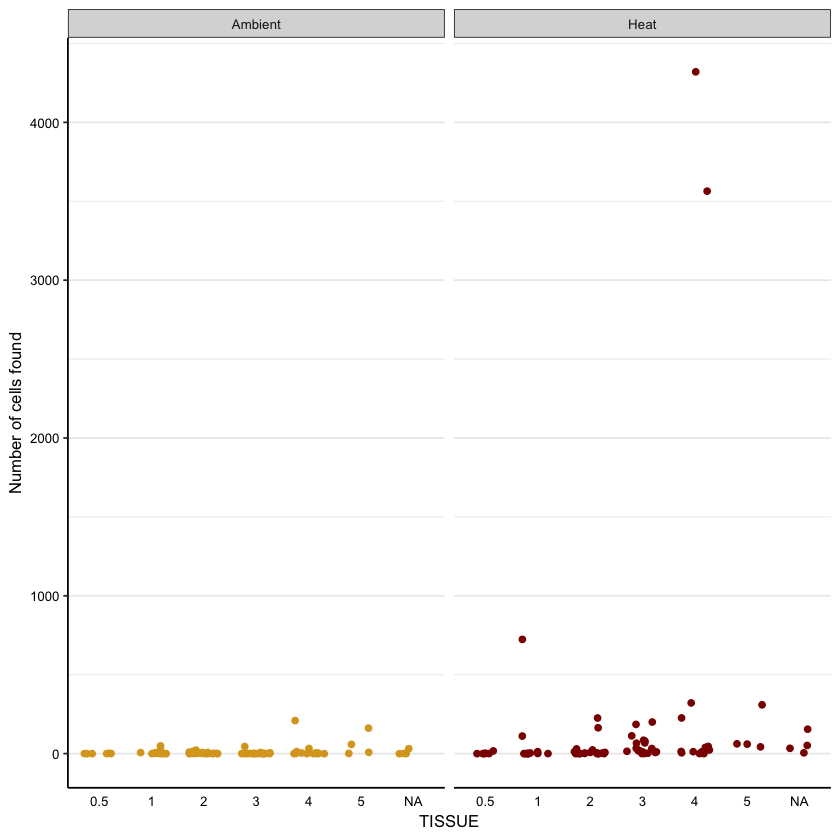

In [695]:
ggplot(survivors, aes(x = TISSUE, y = number, col=Treatment, group=ID)) +
scale_color_manual(values=c("goldenrod", "darkred"))+
       geom_jitter(position=position_jitter(0.3))+
#geom_line()+
 facet_grid(. ~ Treatment)+
theme_bw()+
 
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=10))+
ylab("Number of cells found")

In [694]:
head(survivors)

,ID,Treatment,day,number,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Trial
25,13W,Heat,21,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,one
26,13W,Ambient,7,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,two
27,13W,Heat,23,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,two
28,13W,Ambient,10,1,LOW,0.5,,NA,NA,NA,NA,No,Yes,one
29,13W,Heat,32,17,LOW,0.5,,NA,NA,NA,NA,No,Yes,two
30,13W,Heat,28,3,LOW,0.5,,NA,NA,NA,NA,No,Yes,one


In [730]:
#glmm to look at effect of mackin score on number of cells released. poisson because count data.
mackin=glmm(number~TISSUE, data=survivors, random=-0+ID, varcomps.names=c(ID), poisson.glmm, m=100)

ERROR: Error in glmm(number ~ TISSUE, data = survivors, random = -0 + ID, varcomps.names = c(ID), : object 'ID' not found


In [23]:
summary(mackin)
cor(na.omit(all)$number, na.omit(all)$TISSUE)


Call:
glmm(fixed = number ~ TISSUE, random = ~0 + ID, varcomps.names = "ID", 
    data = na.omit(all), family.glmm = poisson.glmm, m = 100)


Link is: "log"

Fixed Effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.065940   0.018892   -3.49 0.000482 ***
TISSUE       1.295527   0.004498  288.04  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
   Estimate Std. Error z value Pr(>|z|)/2    
ID   4.1035     0.7972   5.147   1.32e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.2281847

In [104]:
head(all)

ID,month,day,Treatment,number,Salinity,TISSUE,MORTALITY.DATE,Mortality_day,Mortality_seq,Trial
10W,X10,31,HEAT,27,LOW,0.5,,Alive,Alive,one
10W,X11,2,HEAT,0,LOW,0.5,,Alive,Alive,two
11W,X10,20,AMBIENT,0,LOW,1.0,7-Nov,7,24,one
11W,X11,7,HEAT,13,LOW,1.0,7-Nov,7,24,one
11W,X10,24,AMBIENT,1,LOW,1.0,7-Nov,7,24,two
12W,X10,31,HEAT,302,LOW,1.0,,Alive,Alive,one


In [307]:
multi = function(x) {
      c(avg = mean(x, na.rm=TRUE), se = sd(x, na.rm=TRUE)/sqrt(length(x)) )
}

In [696]:
means=as.data.frame(aggregate(number~ID+Treatment, data=survivors, FUN=mean))


In [697]:
head(means)

ID,Treatment,number
13W,Ambient,0.5
16W,Ambient,1.5
1W,Ambient,2.5
20W,Ambient,24.5
21W,Ambient,1.5
26W,Ambient,0.5


In [698]:
means=pivot_wider(means, id_cols=ID, names_from=Treatment, values_from=number)
head(means)

ID,Ambient,Heat
13W,0.5,10.0
16W,1.5,6.0
1W,2.5,1.5
20W,24.5,0.0
21W,1.5,15.0
26W,0.5,165.5


[1] 48

In [699]:
means=na.omit(means)

In [700]:
length(unique(means$ID))

[1] 39

In [701]:
means$diff=means$Heat-means$Ambient

In [702]:
diffs$Salinity=ifelse(substr(diffs$ID,3,3)=="W", "Low", "High")
diffs$avg=as.numeric(as.character(diffs$number))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [703]:
means$Salinity=ifelse(substr(means$ID,3,3)=="W", "Low", "High")

In [704]:
diffsm=merge(means, oysters, by="ID")

In [705]:
#combine 0.5 and 1 and 4 and 5 
diffsm$Tissue_sim=ifelse(diffsm$TISSUE==0.5, 1.0, ifelse(diffsm$TISSUE==5, 4.0, diffsm$TISSUE))

In [706]:
diffsm_out=diffsm[!diffsm$ID=="26Y",]

In [707]:
head(diffsm_out)

ID,Ambient,Heat,diff,Salinity.x,Salinity.y,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Tissue_sim
13W,0.5,10.0,9.5,Low,LOW,0.5,,NA,NA,NA,NA,No,Yes,1
16W,1.5,6.0,4.5,Low,LOW,4.0,,NA,NA,NA,NA,Yes,Yes,4
1W,2.5,1.5,-1.0,High,LOW,2.0,,NA,NA,NA,NA,Yes,Yes,2
20W,24.5,0.0,-24.5,Low,LOW,1.0,,NA,NA,NA,NA,No,Yes,1
21W,1.5,15.0,13.5,Low,LOW,2.0,,NA,NA,NA,NA,Yes,Yes,2
26W,0.5,165.5,165.0,Low,LOW,4.0,,NA,NA,NA,NA,Yes,Yes,4


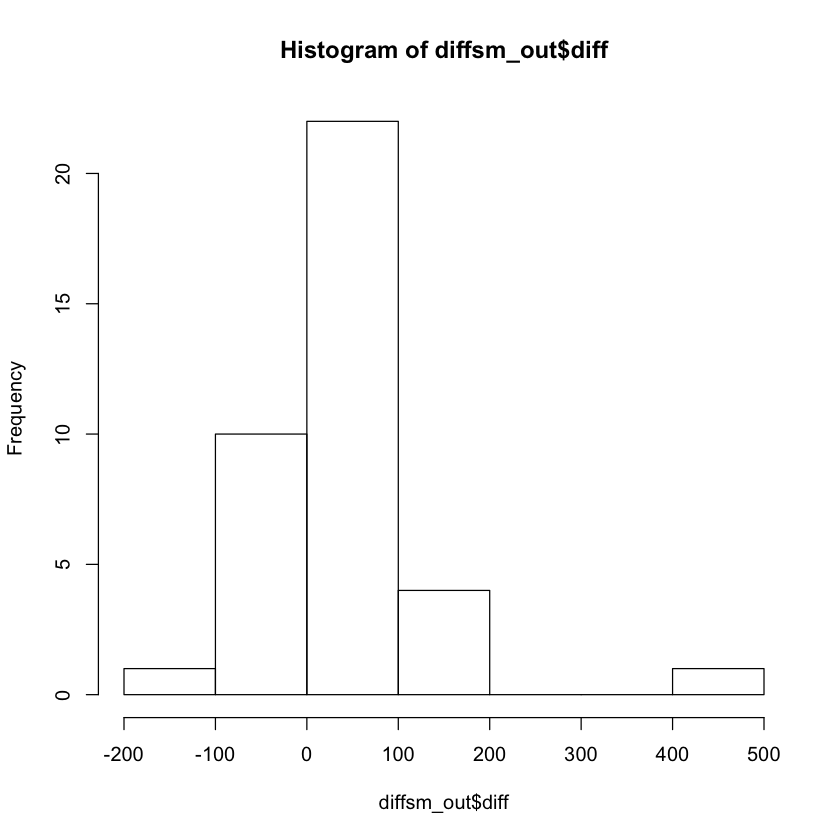

In [708]:
hist(diffsm_out$diff)

well, that is the most normally distributed one...can we just deal with the high values separately? 

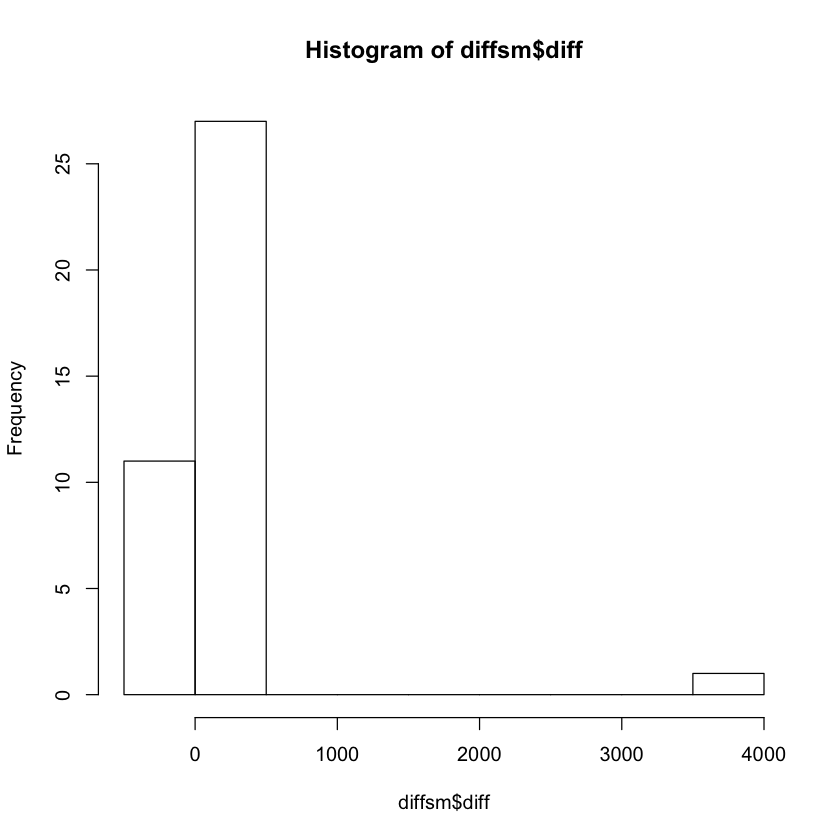

In [709]:
hist(diffsm$diff)

In [710]:
diffsm$logdiff=ifelse(diffsm$diff>0, log10(diffsm$diff+1), ifelse(diffsm$diff==0, 0, -log10(abs(diffsm$diff)+1)))

Warning message in ifelse(diffsm$diff > 0, log10(diffsm$diff + 1), ifelse(diffsm$diff == :
“NaNs produced”

Warning message:
“Removed 2 rows containing missing values (geom_bar).”

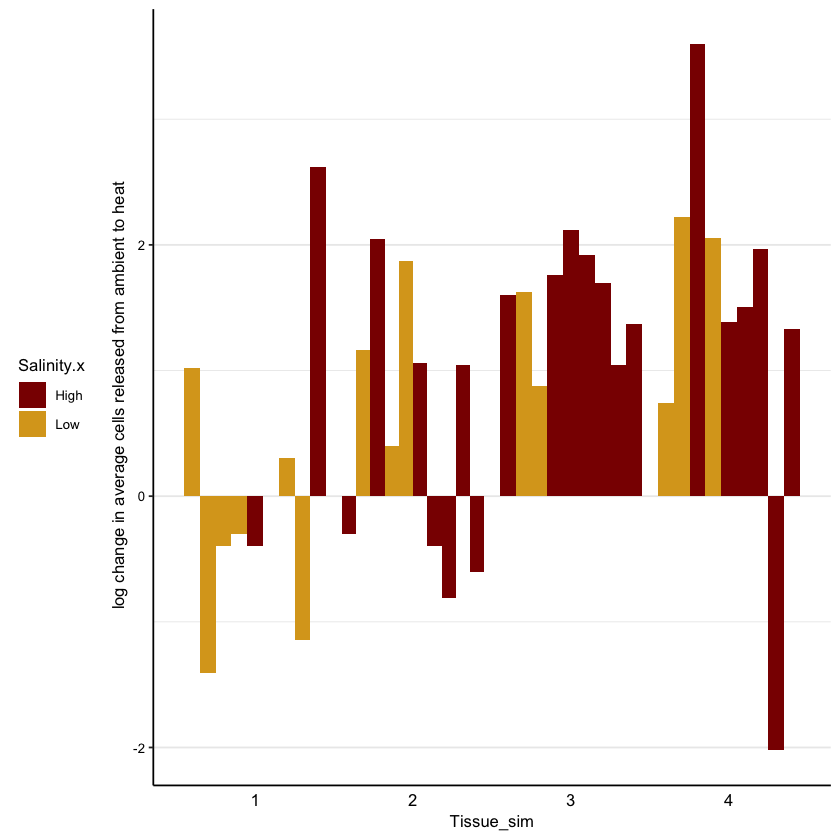

In [711]:
ggplot(diffsm, aes(x = Tissue_sim, y = logdiff, group=ID, fill=Salinity.x)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
geom_bar(stat="identity", position="dodge")+
theme_bw()+
 theme(legend.position="left", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
       axis.text.x=element_text(size=10), 
         text = element_text(size=10))+
#ylim(-15,10000)+
ylab(" log change in average cells released from ambient to heat")

Warning message:
“Removed 2 rows containing missing values (geom_bar).”

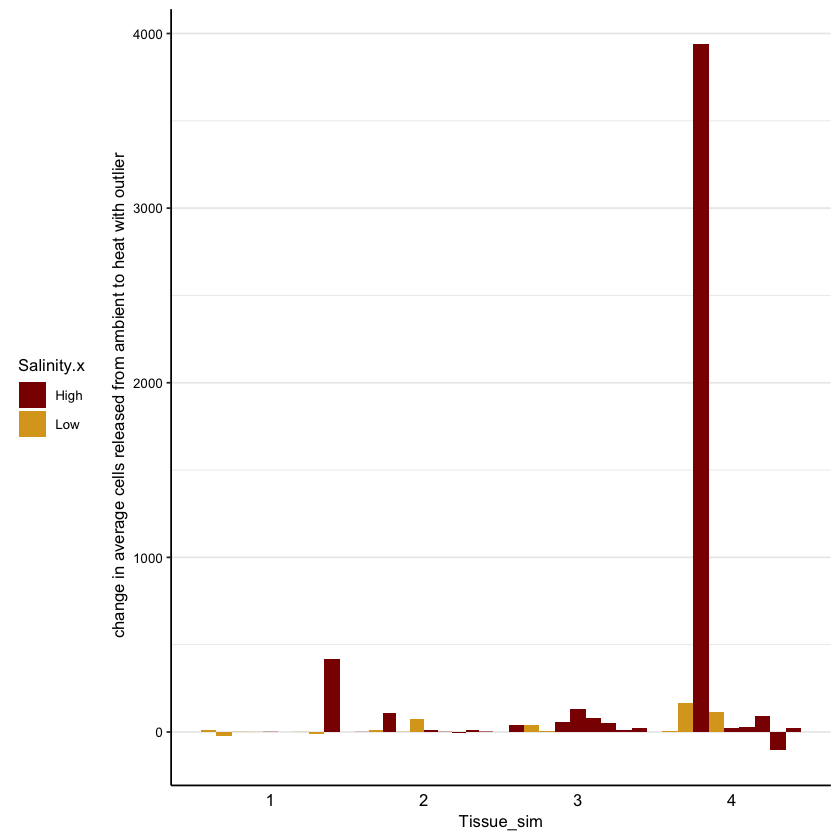

In [712]:
ggplot((diffsm), aes(x = Tissue_sim, y = diff, group=ID, fill=Salinity.x)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
geom_bar(stat="identity", position="dodge")+
theme_bw()+
 theme(legend.position="left", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
       axis.text.x=element_text(size=10), 
          text = element_text(size=10))+
#ylim(-5,5)+
ylab(" change in average cells released from ambient to heat with outlier")

Warning message:
“Removed 2 rows containing missing values (geom_bar).”

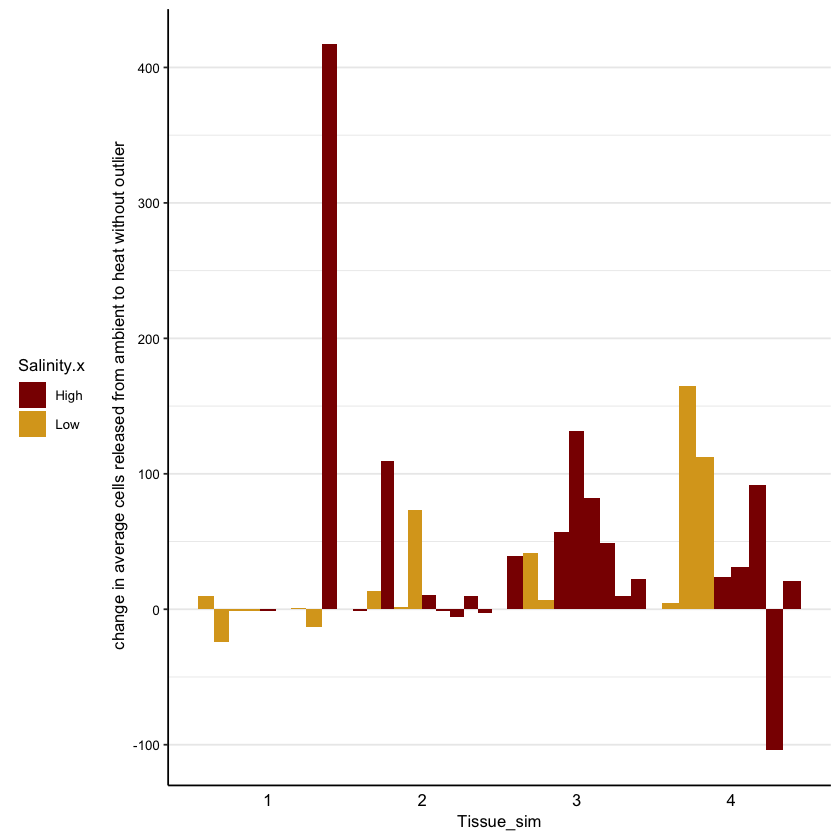

In [713]:
ggplot((diffsm_out), aes(x = Tissue_sim, y = diff, group=ID, fill=Salinity.x)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
geom_bar(stat="identity", position="dodge")+
theme_bw()+
 theme(legend.position="left", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
       axis.text.x=element_text(size=10), 
          text = element_text(size=10))+
#ylim(-5,5)+
ylab(" change in average cells released from ambient to heat without outlier")

one sample t test with null as 0. 
run a separate t test, alternatively do a 95% ci and see if they overlap 
plot difference value as function of score. 

Look at relationship between intensity and shedding. if there is a relationship then need to deal with it. maybe an ancova? have to do it separately for each one unless its the same relationship. 

difference value is your dependent variable. Can you build a model that is looking at salinity by intensity? 
y axis is difference between temps. x axis is intensity, graph the two salinity

also could just look at differeence for high and low salniigy
if theres no relationship with intensity, fine to just compare high and low salinity. 

In [715]:
t.test(diffsm_out$diff, mu=0)


	One Sample t-test

data:  diffsm_out$diff
t = 3.0139, df = 37, p-value = 0.004637
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 12.80213 65.32945
sample estimates:
mean of x 
 39.06579 


In [717]:
min(na.omit(diffsm$diff))

[1] -104

In [718]:
##logtransform for stats
diffsm$pos=(diffsm$diff+105)
diffsm$trans=log10(diffsm$diff+105)
diffsm_out$trans=log10(diffsm_out$diff+105)

In [719]:
boxcox(diffsm$pos, lambda =  c(-2, 2) , 
    optimize = TRUE, objective.name = "Shapiro-Wilk", 
    eps = .Machine$double.eps, include.x = TRUE)


Results of Box-Cox Transformation
---------------------------------

Objective Name:                  Shapiro-Wilk

Data:                            diffsm$pos

Sample Size:                     39

Bounds for Optimization:         lower = -2
                                 upper =  2

Optimal Value:                   lambda = 0.109025

Value of Objective:              Shapiro-Wilk = 0.6184229


In [720]:
diffsm$pos

[1]  114.5  109.5  104.0   80.5  118.5  270.0 4042.5  217.5  103.5  128.5
[11]  144.0  183.5  136.0  214.5  146.5  104.0  196.5  106.5  103.5  105.0
[21]    1.0  178.5  106.0  125.5  111.5  162.0   92.0  236.5  522.0  115.5
[31]  103.5  187.5  154.0  133.5   99.5  115.0  115.0  127.5  102.0

In [722]:
boxcoxTransform(diffsm$pos, lambda= 0.109025)

[1]  6.207042  6.132358  6.046611  5.627505  6.264726  7.714824 13.510188
 [8]  7.321390  6.038617  6.401681  6.596255  7.018537  6.498296  7.296433
[15]  6.625873  6.046611  7.139812  6.086076  6.038617  6.062497  0.000000
[22]  6.969845  6.078249  6.361621  6.162589  6.800048  5.844539  7.472679
[29]  8.973250  6.221630  6.038617  7.056646  6.712102  6.466630  5.973395
[36]  6.214350  6.214350  6.388421  6.014426

In [725]:
boxcoxTransform(105, lambda= 0.109025)

[1] 6.062497

In [726]:
t.test(boxcoxTransform(diffsm$pos, lambda= 0.109025), mu=6.06249745338836)


	One Sample t-test

data:  boxcoxTransform(diffsm$pos, lambda = 0.109025)
t = 1.7405, df = 38, p-value = 0.08987
alternative hypothesis: true mean is not equal to 6.062497
95 percent confidence interval:
 5.986368 7.071957
sample estimates:
mean of x 
 6.529162 


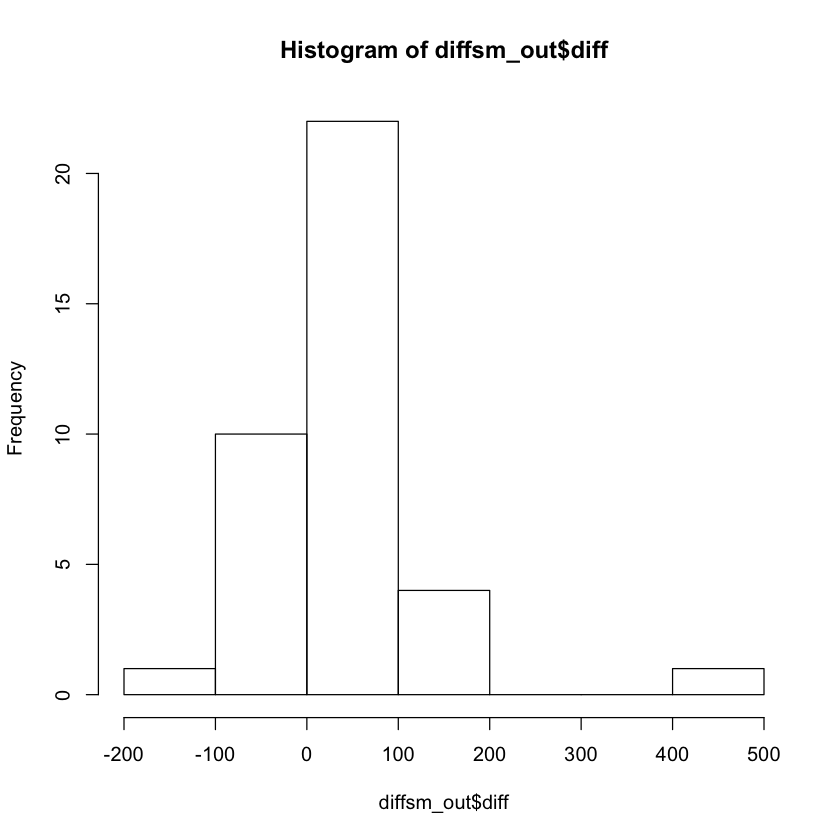

In [729]:
hist(diffsm_out$diff)

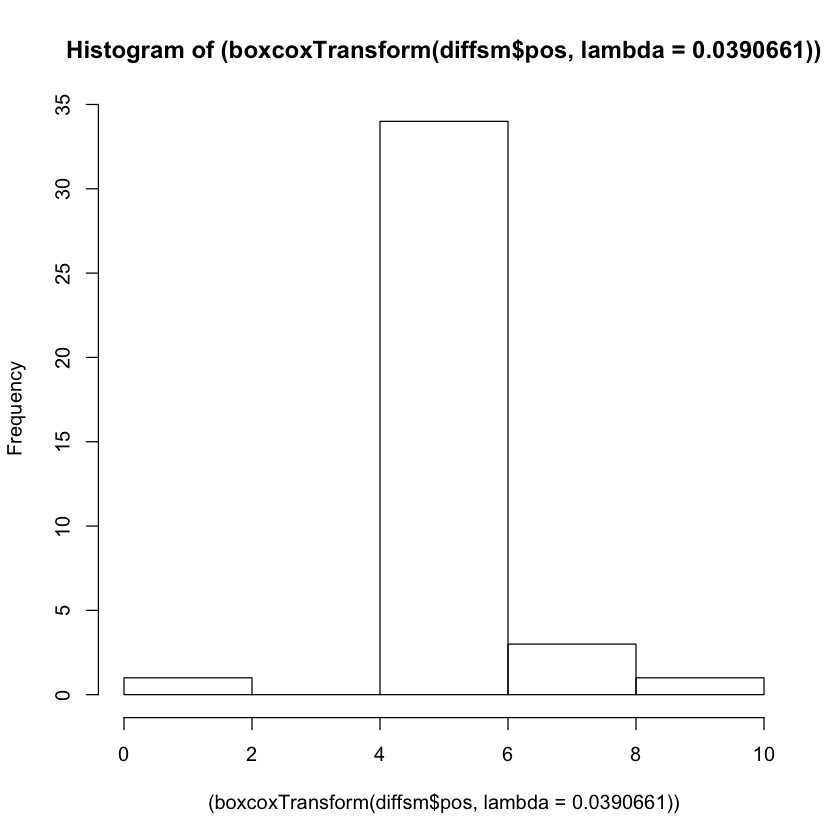

In [727]:
hist((boxcoxTransform(diffsm$pos, lambda=0.0390661)))

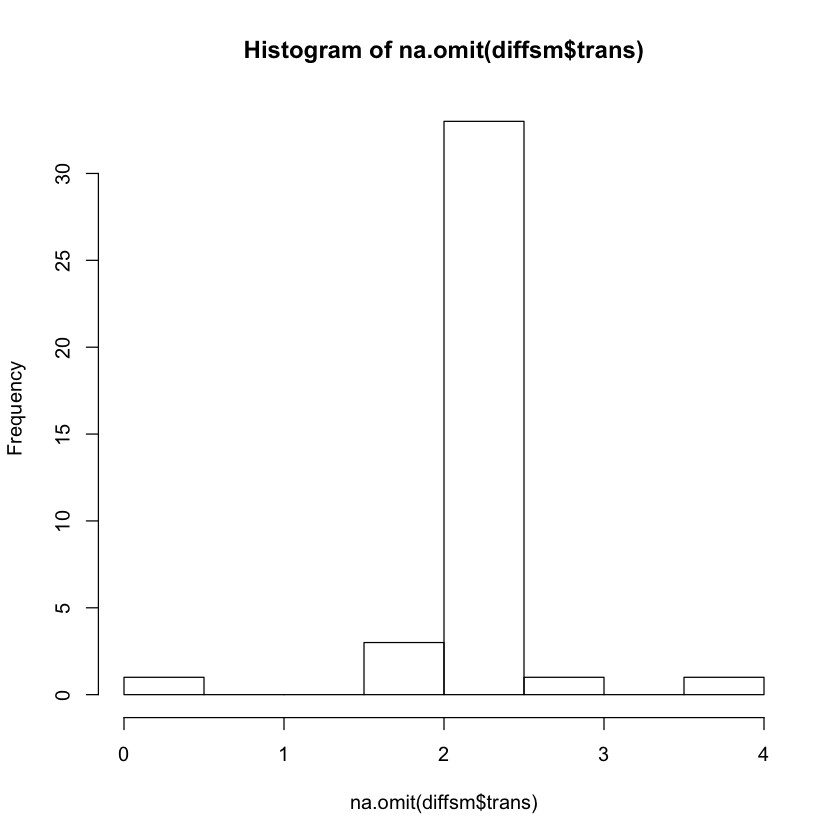

In [728]:
hist(na.omit(diffsm$trans))

In [ ]:
head(diffs$)

In [662]:
t.test(na.omit(diffsm$trans), mu=log10(105))


	One Sample t-test

data:  na.omit(diffsm$trans)
t = 1.2339, df = 31, p-value = 0.2265
alternative hypothesis: true mean is not equal to 2.021189
95 percent confidence interval:
 1.950836 2.307057
sample estimates:
mean of x 
 2.128947 


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'avg' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capt

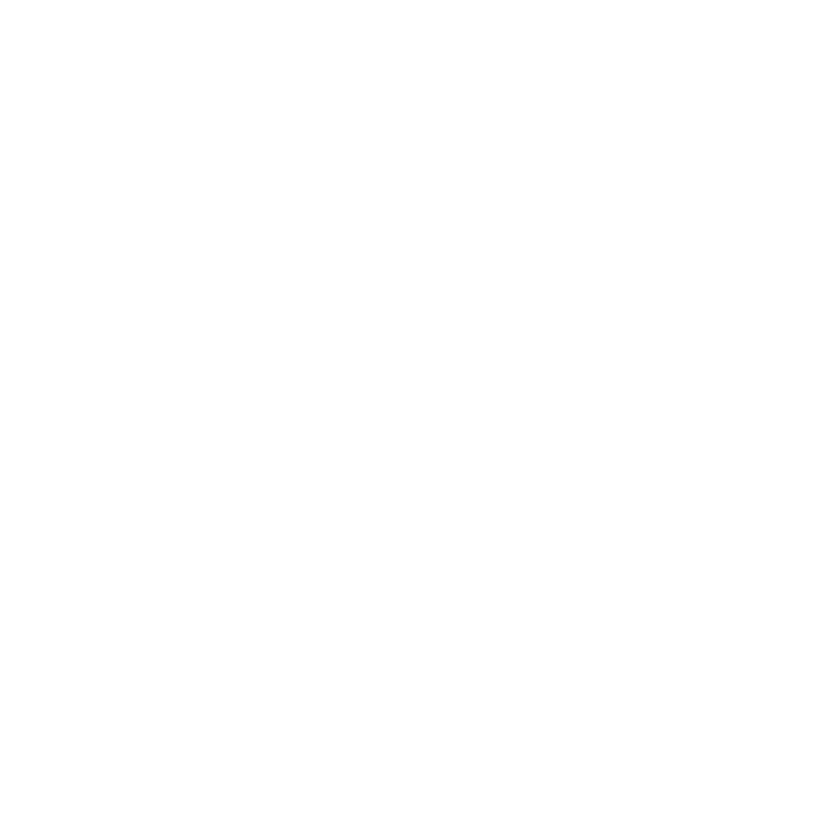

In [427]:
ggplot(na.omit(diffsm), aes(x = TISSUE, y = avg)) +
geom_point()+
theme_bw()+
 theme(legend.position="left", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=10))+
ylab("change in average cells released from ambient to heat")

In [32]:
cor(na.omit(diffsm)$TISSUE, na.omit(diffsm)$avg)
linearMod <- lm(avg~TISSUE, data=na.omit(diffsm))
summary(linearMod)

[1] 0.3770456


Call:
lm(formula = avg ~ TISSUE, data = na.omit(diffsm))

Residuals:
    Min      1Q  Median      3Q     Max 
-325.44 -110.69  -68.44    9.56  778.56 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -62.56      73.77  -0.848  0.40079   
TISSUE         71.00      25.72   2.761  0.00825 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 237 on 46 degrees of freedom
Multiple R-squared:  0.1422,	Adjusted R-squared:  0.1235 
F-statistic: 7.623 on 1 and 46 DF,  p-value: 0.00825


In [35]:
ancovasal=lm(data=na.omit(diffsm), avg~Salinity.x+TISSUE)
summary(ancovasal)


Call:
lm(formula = avg ~ Salinity.x + TISSUE, data = na.omit(diffsm))

Residuals:
    Min      1Q  Median      3Q     Max 
-341.73 -117.72  -50.11   29.43  762.27 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)     -13.44      88.12  -0.153   0.8794  
Salinity.xLow   -75.35      74.01  -1.018   0.3141  
TISSUE           62.79      26.94   2.331   0.0243 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 236.9 on 45 degrees of freedom
Multiple R-squared:  0.1615,	Adjusted R-squared:  0.1242 
F-statistic: 4.333 on 2 and 45 DF,  p-value: 0.01902


In [36]:
head(all)

ID,month,day,Treatment,number,Salinity,TISSUE,MORTALITY.DATE,Trial
10W,X10,31,HEAT,27,LOW,0.5,,one
10W,X11,2,HEAT,0,LOW,0.5,,two
11W,X11,7,HEAT,13,LOW,1,7-Nov,one
11W,X10,24,AMBIENT,1,LOW,1,7-Nov,two
11W,X10,20,AMBIENT,0,LOW,1,7-Nov,one
12W,X10,31,HEAT,302,LOW,1,,one


In [37]:
ancovasal2=lm(data=na.omit(all), number~Salinity+TISSUE)
summary(ancovasal)


Call:
lm(formula = avg ~ Salinity.x + TISSUE, data = na.omit(diffsm))

Residuals:
    Min      1Q  Median      3Q     Max 
-341.73 -117.72  -50.11   29.43  762.27 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)     -13.44      88.12  -0.153   0.8794  
Salinity.xLow   -75.35      74.01  -1.018   0.3141  
TISSUE           62.79      26.94   2.331   0.0243 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 236.9 on 45 degrees of freedom
Multiple R-squared:  0.1615,	Adjusted R-squared:  0.1242 
F-statistic: 4.333 on 2 and 45 DF,  p-value: 0.01902


following schwartz do a repeated measures. Four diffferent response variables (four time points)?? . within subjects factor is temp and between is salinity. Construct it as multiple anova but manova. Repeated measures manova. Sequential temperature. 


In [38]:
unique()

ERROR: Error in is.factor(x): argument "x" is missing, with no default


difference value between ambient and heat, expect to be zero if theres no effect. need to account for oyster ID. 

Notes from talking to Lisa:
Is there info on metabolic rate of ectotherm/oysters and temperature Growth rate or filtration rate? 
Filtration and release rates as a function of temperature, plus pathogen infection probability. 
ARe pathogens growing faster, or are they infecting more efficiently, or are they 
Also focusing more on the host makes it easier to translate to alternate hosts
Encorporate salinity just into the pathogen dynamics? 
Can't just be like temperature only affects oysters and salinity only affects the pathogen. 
Look at temperature effects on perkinsus marinus. 

See if there's a metabolic response to salinity on the oyster... Need to 

Are there papers about Perkinsus and temperature? 

I decide if there are more experiments to tease apart hypotheses. 

What is the tempareture range 


## Things to do next:
Decide if you want to divide into low and high release. (take out outlier) 

mackin score on max number of cells released

Influence of days before death on #cells released (for last day) 

Compare last value of ones that survived to ones that died. also compare to gapers?

Count number of high releases in each category?
Can you plot it over time for each oyster? 

Put tillie's data into a separate notebook. 

## Tillie's time data

In [34]:
time=read.csv("MN_Cellsfound.csv")
oystertime=read.csv("MN_Oysters.csv")

In [35]:
oystertime_s=oystertime[c(2,7)]

In [36]:
time_oyster_1=merge(time, oystertime_s, by="Replicate")

In [37]:
head(time_oyster_1)

Replicate,Time,Salinity,number,Temp,RFTM.Score
1,6,Low,0,68.35599,0
1,24,Low,0,81.18714,0
1,18,Low,0,87.06976,0
1,12,Low,0,79.85940,0
2,6,Low,0,68.35599,0
2,24,Low,0,81.18714,0


In [38]:
light= data.frame("Time"=c("6", "12", "18", "24"), "Watts" = c(0,217265/60, 300291/60, 42664/60))

In [39]:
time_oyster=merge(time_oyster_1, light, by="Time")

In [40]:
list_mean=aggregate(time_oyster$number, by=list(time_oyster$Replicate),
  FUN=sum, na.rm=TRUE)
keep=list_mean[!list_mean$x==0,]
colnames(keep)=c("Replicate","total")

In [41]:
time_oyster$number=as.numeric(as.character(time_oyster$number))
time_oyster$Replicate=as.factor(as.character(time_oyster$Replicate))
time_oyster$Time=factor(as.character(time_oyster$Time), levels=c(6, 12, 18, 24), order=FALSE)

infected_time=merge(time_oyster, keep, by="Replicate")
infected_time$percent=infected_time$number/infected_time$total*100

In [42]:
infected_time$lognum=log10(infected_time$number+1)

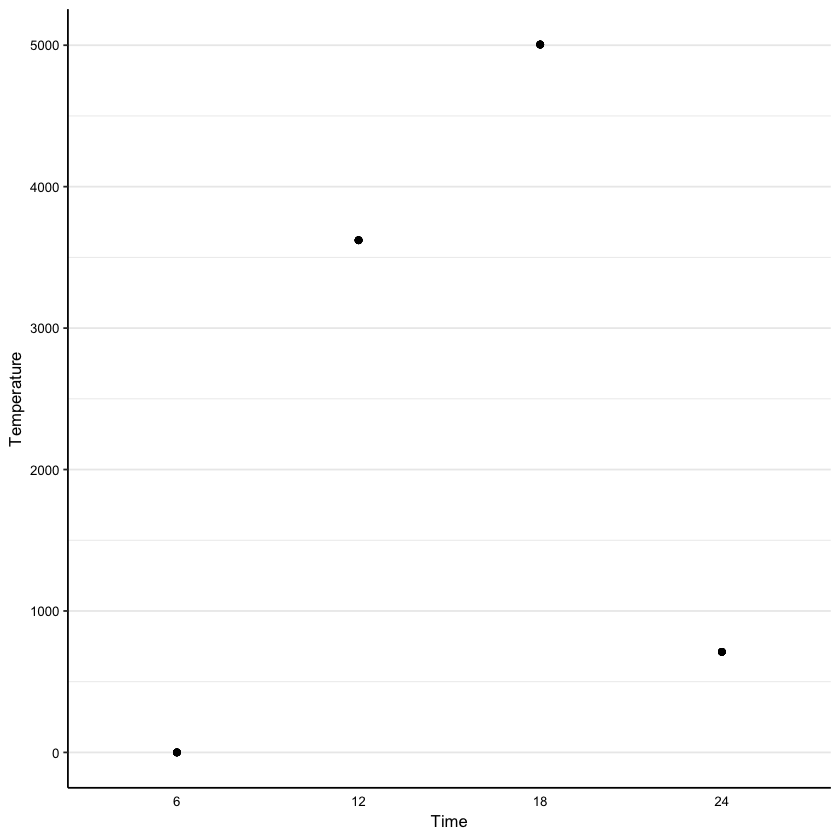

In [43]:
ggplot(na.omit(infected_time), aes(x = Time, y = Watts)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point()+
geom_line()+
#facet_grid(. ~ Salinity)+
theme_bw()+
 theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=10))+
ylab("Temperature")

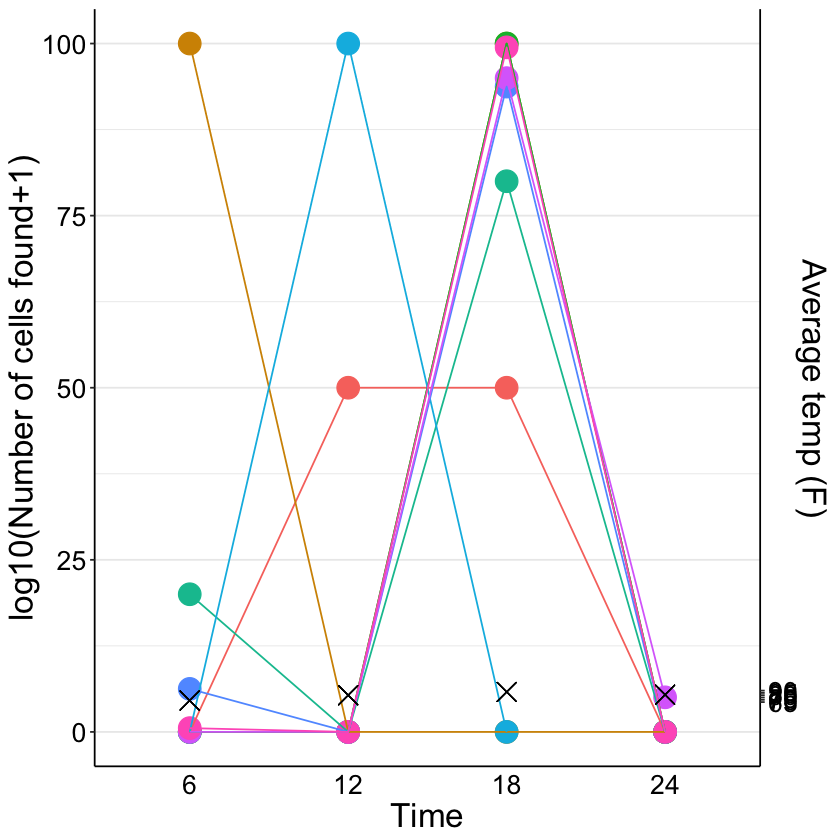

In [44]:
ggplot(na.omit(infected_time), aes(x = Time, y = percent, col=Replicate, group=Replicate)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point(size=6)+
geom_line()+
#facet_grid(. ~ Salinity)+
geom_point(aes(x = Time, y = Temp/15), col="black", pch=4, size=5)+
   scale_y_continuous(sec.axis = sec_axis(~.*15, name = "Average temp (F)", breaks=c(65, 70, 75, 80, 85, 90)))+
theme_bw()+
 theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("log10(Number of cells found+1)")

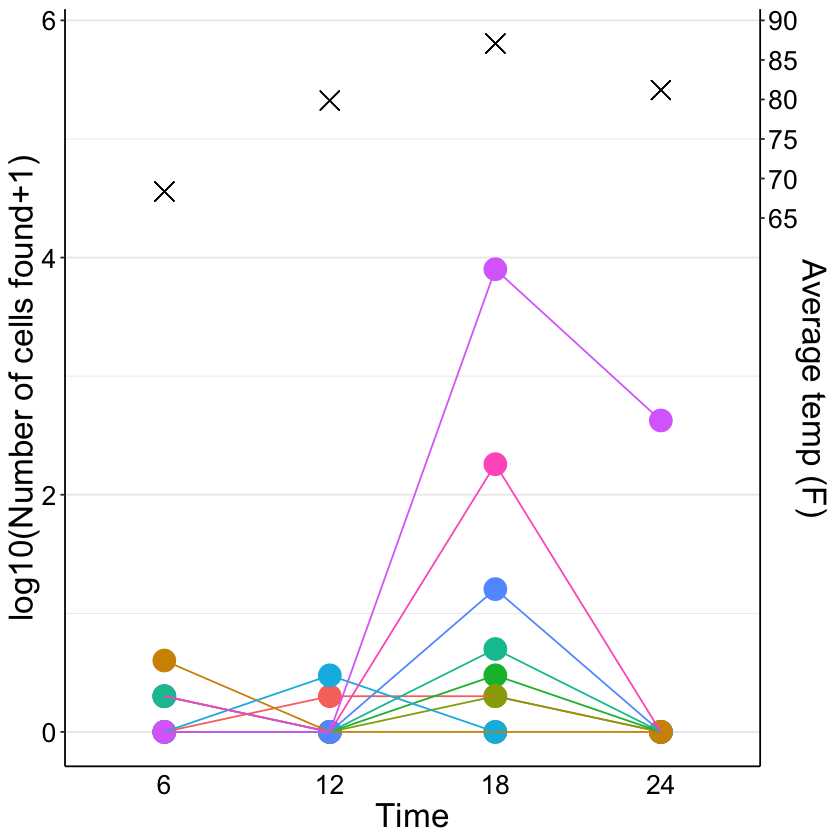

In [49]:
ggplot(na.omit(infected_time), aes(x = Time, y = lognum, col=Replicate, group=Replicate)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point(size=6)+
geom_line()+
#facet_grid(. ~ Salinity)+
geom_point(aes(x = Time, y = Temp/15), col="black", pch=4, size=5)+
   scale_y_continuous(sec.axis = sec_axis(~.*15, name = "Average temp (F)", breaks=c(65, 70, 75, 80, 85, 90)))+
theme_bw()+
 theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("log10(Number of cells found+1)")

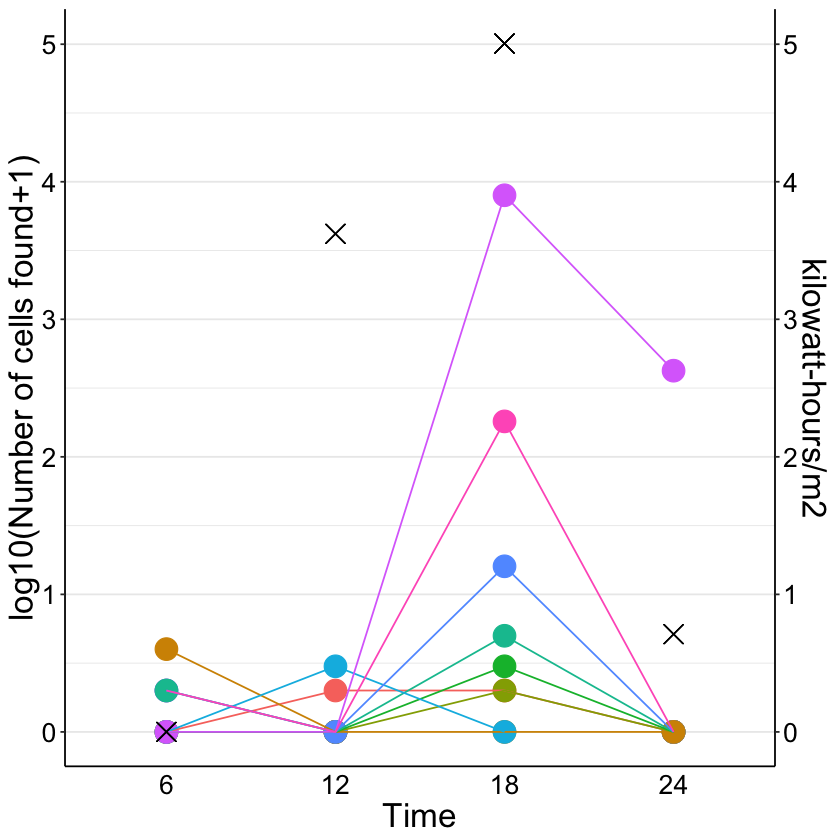

In [50]:
ggplot(na.omit(infected_time), aes(x = Time, y = lognum, col=Replicate, group=Replicate)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point(size=6)+
geom_line()+
#facet_grid(. ~ Salinity)+
geom_point(aes(x = Time, y = Watts/1000), col="black", pch=4, size=5)+
   scale_y_continuous(sec.axis = sec_axis(~., name = "kilowatt-hours/m2", breaks=c(0, 1, 2, 3, 4, 5)))+
theme_bw()+
 theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("log10(Number of cells found+1)")

In [51]:
time_oyster$number=as.integer(time_oyster$number)

In [52]:
temp=glmm(number~Temp, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)
time=glmm(number~Time, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)
light=glmm(number~Watts, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)


In [45]:
head(time_oyster)

Time,Replicate,Salinity,number,Temp,RFTM.Score,Watts
6,1,Low,0,68.35599,0.0,0
6,11,Low,0,68.35599,0.0,0
6,31,High,0,68.35599,0.5,0
6,21,Intermediate,0,68.35599,0.5,0
6,2,Low,0,68.35599,0.0,0
6,22,Intermediate,0,68.35599,0.0,0


In [48]:
ancovasal=lm(data=time_oyster[!is.na(time_oyster$number),], number~Salinity+RFTM.Score+Time)
summary(ancovasal)


Call:
lm(formula = number ~ Salinity + RFTM.Score + Time, data = time_oyster[!is.na(time_oyster$number), 
    ])

Residuals:
   Min     1Q Median     3Q    Max 
-483.9 -180.4  -54.8  138.6 7354.9 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)          -150.13330  144.04863  -1.042   0.2992  
SalinityIntermediate    3.06672  141.65937   0.022   0.9828  
SalinityLow           193.40374  141.22164   1.370   0.1732  
RFTM.Score             68.61018   31.06131   2.209   0.0289 *
Time12                 -0.08333  158.24423  -0.001   0.9996  
Time18                234.75058  159.39092   1.473   0.1432  
Time24                 11.48853  166.30111   0.069   0.9450  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 671.4 on 130 degrees of freedom
Multiple R-squared:  0.0741,	Adjusted R-squared:  0.03137 
F-statistic: 1.734 on 6 and 130 DF,  p-value: 0.118


In [53]:
summary(time)


Call:
glmm(fixed = number ~ Time, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -6.9380     0.4083  -16.99   <2e-16 ***
Time12       -0.6931     0.7071   -0.98    0.327    
Time18        7.2177     0.4084   17.67   <2e-16 ***
Time24        4.2539     0.4111   10.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate    4.055      0.960   4.224    1.2e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [54]:
summary(temp)


Call:
glmm(fixed = number ~ Temp, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -49.588551   0.688100  -72.07   <2e-16 ***
Temp          0.572518   0.007929   72.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate    4.060      0.958   4.238   1.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [55]:
summary(light)


Call:
glmm(fixed = number ~ Watts, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.382e+00  9.295e-02  -68.66   <2e-16 ***
Watts        1.305e-03  1.927e-05   67.70   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate    4.514      1.065   4.239   1.12e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [56]:
time_oyster$Time=relevel(time_oyster$Time, ref = "12")
time2=glmm(number~Time, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)
summary(time2)


Call:
glmm(fixed = number ~ Time, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -7.6327     0.5774 -13.220   <2e-16 ***
Time6         0.6931     0.7071   0.980    0.327    
Time18        7.9109     0.5775  13.699   <2e-16 ***
Time24        4.9474     0.5794   8.539   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate    4.292      1.019   4.213   1.26e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [57]:
time_oyster$Time=relevel(time_oyster$Time, ref = "18")
time3=glmm(number~Time, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)
summary(time3)


Call:
glmm(fixed = number ~ Time, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.26561    0.01117   23.79   <2e-16 ***
Time12      -7.91105    0.57746  -13.70   <2e-16 ***
Time6       -7.21790    0.40840  -17.67   <2e-16 ***
Time24      -2.96406    0.04992  -59.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate    4.510      1.064   4.239   1.12e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [58]:
time_oyster$Time=relevel(time_oyster$Time, ref = "24")
time4=glmm(number~Time, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)
summary(time4)


Call:
glmm(fixed = number ~ Time, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.70295    0.04889 -55.286   <2e-16 ***
Time18       2.96376    0.04992  59.371   <2e-16 ***
Time12      -4.94720    0.57940  -8.539   <2e-16 ***
Time6       -4.25406    0.41114 -10.347   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate   4.0583     0.9576   4.238   1.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [59]:
summary(temp)


Call:
glmm(fixed = number ~ Temp, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -49.588551   0.688100  -72.07   <2e-16 ***
Temp          0.572518   0.007929   72.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate    4.060      0.958   4.238   1.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Filtration

In [4]:
filtration=read.csv("Filtration.csv")

In [5]:
filtration$change=filtration$Time0-filtration$Time6

In [ ]:
#low1=filtration[filtration$Date=="10/16/19" & filtration$Salinity=="low",]
#c=low1[low1$Oyster=="control",]
#apply(low1[,6:12], 1, function(x) x-c)



In [22]:
paste0(filtration$Oyster[1])

[1] "W4"

In [23]:
infected_filt=filtration[filtration$ID %in% infected$ID,]

In [24]:
head(infected_filt)

,Date,Jar,Salinity,Temp,Oyster,ID,Time0,Time1,Time2,Time3,Time4,Time5,Time6,change
1,10/16/19,1,low,ambient,W4,4W,1.34,0.58,0.48,0.40,0.34,0.30,0.24,1.10
2,10/16/19,2,low,ambient,W29,29W,1.45,0.88,0.64,0.53,0.52,0.43,0.37,1.08
3,10/16/19,3,low,ambient,W28,28W,1.26,0.61,0.48,0.42,0.37,0.35,0.32,0.94
5,10/16/19,5,low,ambient,W42,42W,1.27,0.78,0.62,0.54,0.46,0.42,0.37,0.90
6,10/16/19,6,low,ambient,W26,26W,1.26,0.76,0.65,0.52,0.47,0.43,0.38,0.88
7,10/16/19,7,low,ambient,W45,45W,1.31,0.65,0.48,0.34,0.28,0.24,0.21,1.10


In [77]:
infected_filt$change=infected_filt$Time0-infected_filt$Time6

In [93]:
head(infected_filt)

,Date,Jar,Salinity,Temp,Oyster,ID,Time0,Time1,Time2,Time3,Time4,Time5,Time6,change
1,10/16/19,1,low,ambient,W4,4W,1.34,0.58,0.48,0.40,0.34,0.30,0.24,1.10
2,10/16/19,2,low,ambient,W29,29W,1.45,0.88,0.64,0.53,0.52,0.43,0.37,1.08
3,10/16/19,3,low,ambient,W28,28W,1.26,0.61,0.48,0.42,0.37,0.35,0.32,0.94
5,10/16/19,5,low,ambient,W42,42W,1.27,0.78,0.62,0.54,0.46,0.42,0.37,0.90
6,10/16/19,6,low,ambient,W26,26W,1.26,0.76,0.65,0.52,0.47,0.43,0.38,0.88
7,10/16/19,7,low,ambient,W45,45W,1.31,0.65,0.48,0.34,0.28,0.24,0.21,1.10


In [26]:
infected_filt=pivot_longer(infected_filt,  cols = starts_with("Time"), names_to = "Time")

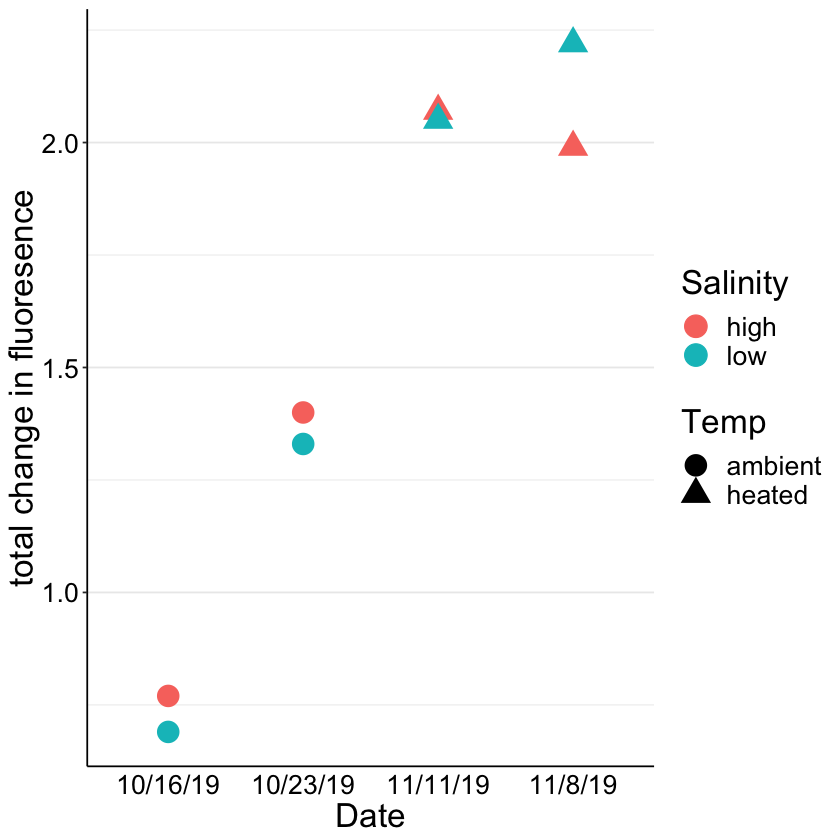

In [33]:
ggplot(na.omit(filtration[filtration$ID=="CONTROL",]), aes(x = Date, y = change, shape=Temp, col=Salinity, group=ID)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point(size=6)+
#geom_line()+
#facet_grid(. ~ Salinity)+

theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("total change in fluoresence")

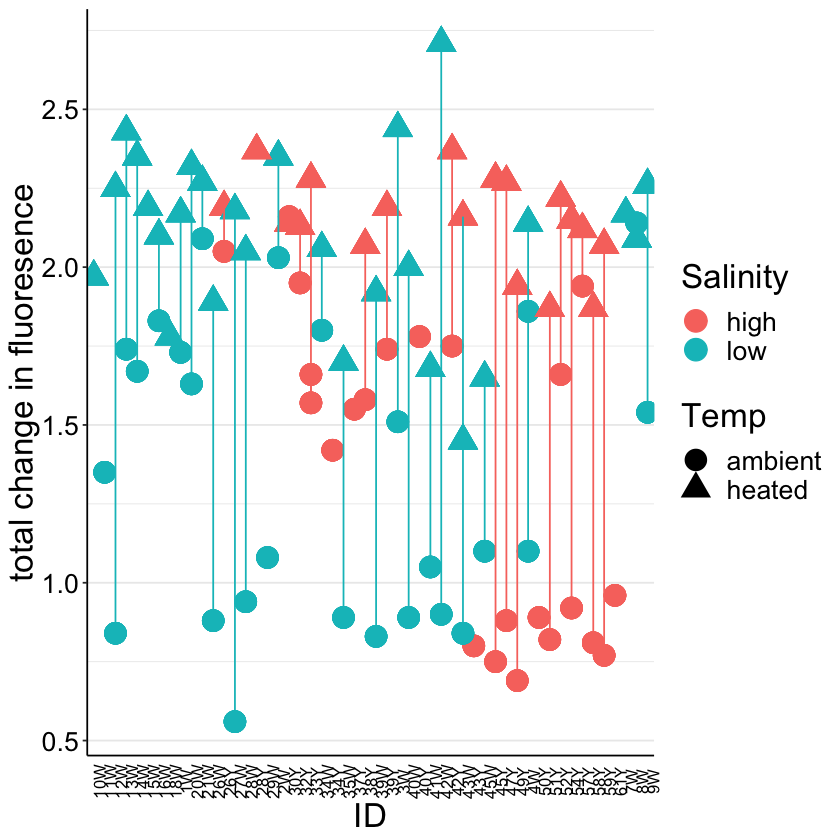

In [32]:
ggplot(na.omit(infected_filt), aes(x = ID, y = change, shape=Temp, col=Salinity, group=ID)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point(size=6)+
geom_line()+
#facet_grid(. ~ Salinity)+

theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text=element_text(size=20),
       axis.text.x = element_text(size=10, angle=90))+
ylab("total change in fluoresence")

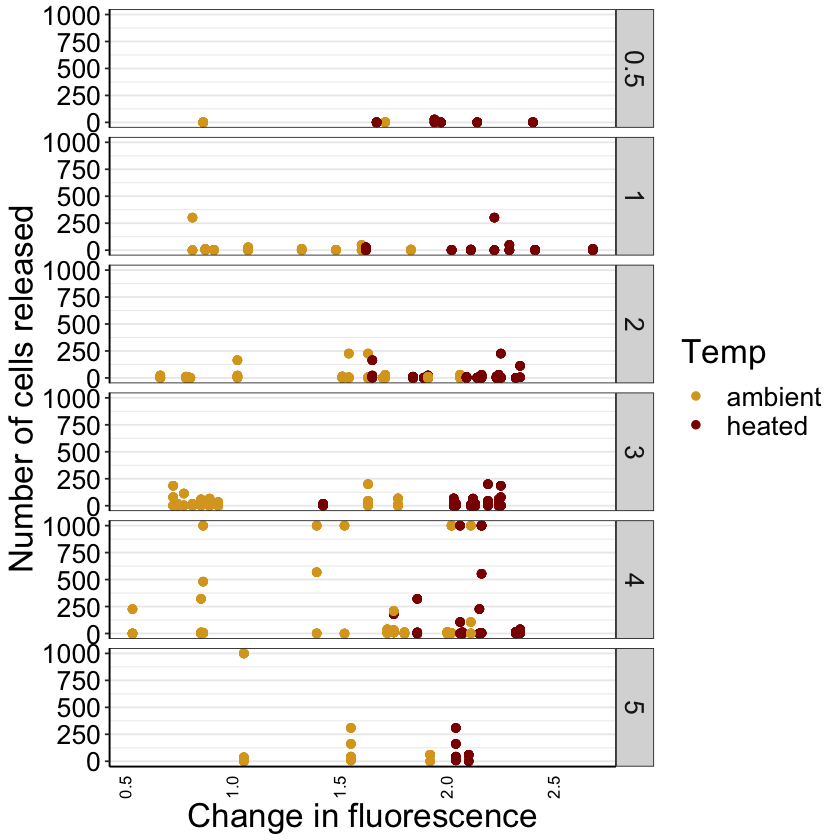

In [30]:
ggplot(na.omit(infected_filt_all), aes(x = change, y = number, col=Temp)) +
scale_color_manual(values=c( "goldenrod", "darkred"))+
        geom_point(size=2)+
#geom_line()+
facet_grid( TISSUE~.)+

theme_bw()+
 theme(legend.position="right", 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text=element_text(size=20),
       axis.text.x = element_text(size=10, angle=90))+
ylab("Number of cells released")+
xlab("Change in fluorescence")

From Gedan 2014: Five individual mussels or oysters were introducedinto each mesocosm (n=5 per species) prior to the feeding trialfor 16 hours of pre-trial starvation and temperature acclimation.
Two mesocosms were left empty as ungrazed controls. 
Atthe start of the experiments, mesocosms were inoculated with0.6 mL of DT’s (N. oculata[157.5×106cells/mL] andP. tri-cornutum[41.24×106cells/mL]) and 10 mL ofT. chuyiculture[1.36×106cells/mL]. These are live cultures
Seawater samples (10 mL) were drawnupon inoculation and after an hour of feeding and analyzedon a Multisizer 4 Coulter particle counter (Beckman-CoulterInc., Indianapolis, IN, U.S.A.). 

People do measure chlorophyll with fluorescence:  L.  E.  Brand,    R.  R.  L.  Guillard, and   L.  S.  Murphy:    A  method   for  the  rapid   and   precise   determination     of  acclimated    phytoplankton  reproduction     rates.   J.  Plank.    Res.,   3,  193-201   (1980)
But this is with live algae again. Also they use certain color filters specific to chlorophyll. 
Did we not add enough to see a difference between treatments and controls? since chlorophyll degraded. 
Standard curve?
Fluorometer not sensitive enough?

Can also use Fluorescein or Rhodamine which are more stable, but seems more relevant for movement of water around oysters than actual clearance rate, since that depends on particles. 
Jonsson2005

